# Machine Learning Classification Template

### Steps: 
1. Look at the big picture 
2. Get the data 
3. Discover and visualize the data to gain insights 
4. Prepare the data for machine learning algorithms 
5. Select and train the model 
6. Fine-tune the model 
7. Present the solution 
8. Launch, monitor, and maintain the system

- https://github.com/ageron/handson-ml2

### 1. Look at the big picture 
- Frame the problem 
- Select a performance measure 
- Check the assumptions

### 2. Get the data
- Create the workspace (folder)
- Create the virtual environment 
- Download the data 
- Look at data structure 
- Create a train and test set 

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

In [2]:
## Download the data
import pandas as pd
from sodapy import Socrata

# Open Data example
# https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh
client = Socrata("data.cityofnewyork.us", app_token = None, timeout=100)

results = client.get("uvpi-gqnh", limit=5000)

# Convert to pandas DataFrame
df_trees = pd.DataFrame.from_records(results)

In [3]:
## Look at data structure 
df_trees.info()
df_trees['status'].value_counts()
df_trees.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tree_id           5000 non-null   object
 1   block_id          5000 non-null   object
 2   created_at        5000 non-null   object
 3   tree_dbh          5000 non-null   object
 4   stump_diam        5000 non-null   object
 5   curb_loc          5000 non-null   object
 6   status            5000 non-null   object
 7   health            4794 non-null   object
 8   spc_latin         4794 non-null   object
 9   spc_common        4794 non-null   object
 10  steward           4794 non-null   object
 11  guards            4794 non-null   object
 12  sidewalk          4794 non-null   object
 13  user_type         5000 non-null   object
 14  problems          4794 non-null   object
 15  root_stone        5000 non-null   object
 16  root_grate        5000 non-null   object
 17  root_other    

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council_district,census_tract,bin,bbl
count,5000,5000,5000,5000,5000,5000,5000,4794,4794,4794,...,5000,5000,5000,5000,5000,5000,4954,4954,4934,4934
unique,5000,2488,97,49,35,2,3,3,94,94,...,768,1,4998,4999,4999,4999,50,638,4002,3915
top,180683,106403,2015-08-30T00:00:00.000,4,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,1016500,New York,40.78215257,-73.96331506,994405.4269,233951.0486,50,165,1076229,1011147503
freq,1,40,456,457,4894,4774,4794,3513,503,503,...,80,5000,2,2,2,2,326,114,10,10


In [4]:
# only keep columns we want
df_trees = df_trees.drop(['tree_id', 'block_id', 'created_at', 'address', 'zipcode', 'zip_city', 'cb_num', 'borocode', 'cncldist', 'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state', 'x_sp', 'y_sp', 'council_district', 'census_tract', 'bin', 'bbl'], axis=1) 

<AxesSubplot:>

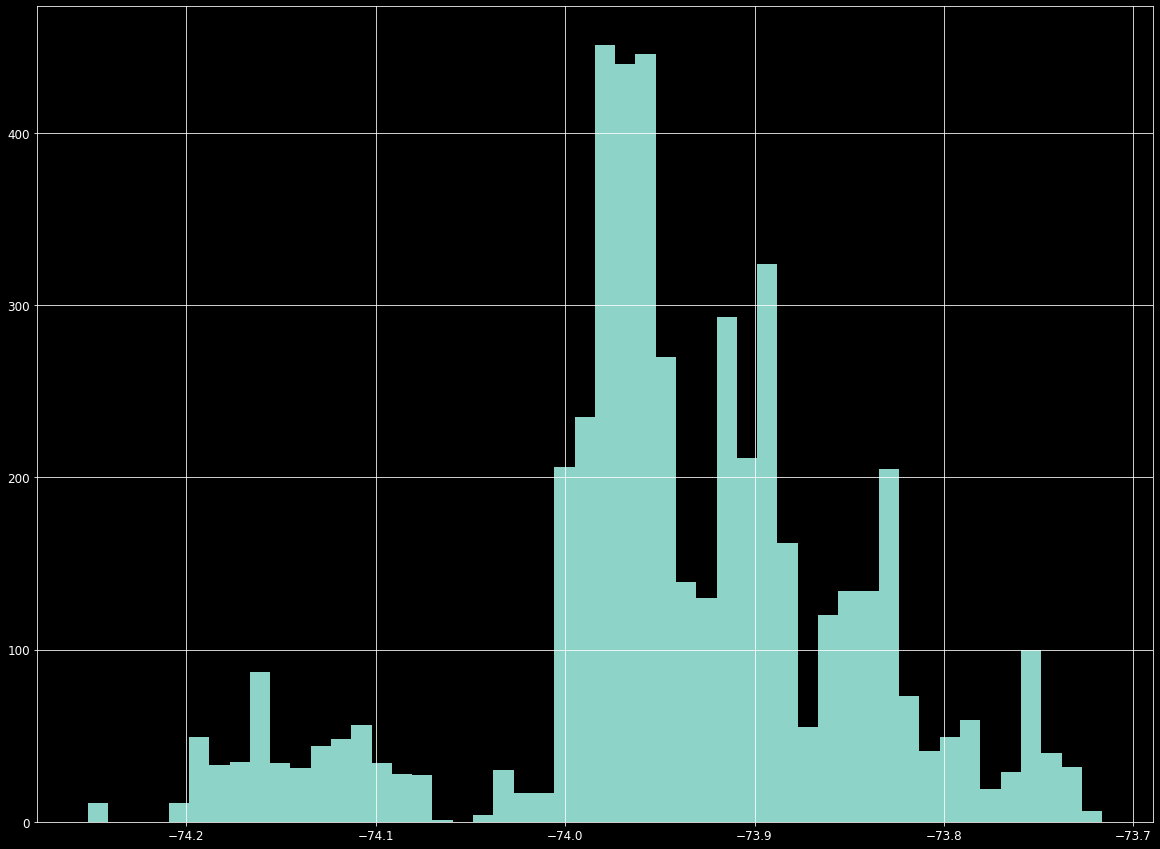

In [5]:
coord_cols = ['longitude', 'latitude']
df_trees[coord_cols] = df_trees[coord_cols].apply(pd.to_numeric, errors='coerce')
diam_cols = ['tree_dbh', 'stump_diam']
df_trees[diam_cols] = df_trees[diam_cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
%matplotlib inline
# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('dark_background')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


df_trees['longitude'].hist(bins=50, figsize=(20,15))

In [6]:
# create a test set 
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_trees, test_size=0.2, random_state=42) 
test_set.head()

,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,...,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,boroname,latitude,longitude
1501,11,0,OnCurb,Alive,Good,Pyrus calleryana,Callery pear,1or2,Harmful,NoDamage,...,No,No,No,No,No,No,No,Manhattan,40.764505,-73.959888
2586,7,0,OnCurb,Alive,Good,Quercus shumardii,Schumard's oak,None,None,NoDamage,...,No,No,No,No,No,No,No,Staten Island,40.638253,-74.116389
2653,2,0,OnCurb,Alive,Fair,Carpinus caroliniana,American hornbeam,1or2,None,NoDamage,...,No,No,No,No,No,No,No,Queens,40.750414,-73.940275
1055,20,0,OnCurb,Alive,Good,Platanus x acerifolia,London planetree,None,None,Damage,...,No,No,No,No,Yes,No,No,Queens,40.740931,-73.757695
705,4,0,OnCurb,Alive,Good,Styphnolobium japonicum,Sophora,1or2,Helpful,Damage,...,No,Yes,No,No,No,No,No,Manhattan,40.747049,-73.992807


<AxesSubplot:>

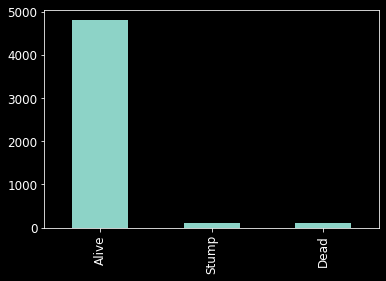

In [7]:
df_trees['status'].value_counts().plot(kind='bar')

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
# stratification is an approach to maintain the original class proportion in resulting subsets

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_trees, df_trees["status"]):
    strat_train_set = df_trees.loc[train_index]
    strat_test_set = df_trees.loc[test_index]

In [9]:
def status_proportions(df_trees):
    return df_trees["status"].value_counts() / len(df_trees)

train_set, test_set = train_test_split(df_trees, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": status_proportions(df_trees),
    "Stratified": status_proportions(strat_test_set),
    "Random": status_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

# shows why you want to stratify with small samples or when there are categories with small counts... stump doesn't exist in non-stratified (random) test set
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
Alive,0.9588,0.959,0.956,-0.292032,0.020859
Dead,0.0200,0.020,0.021,5.000000,0.000000
Stump,0.0212,0.021,0.023,8.490566,-0.943396


### 3. Discover and visualize the data to gain insights 
- Create basic plots or maps
- Look for correlations 
- Experiment with attribute combinations 

In [10]:
# only look at the train set
trees = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

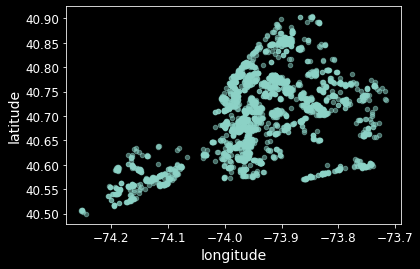

In [11]:
trees.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5)

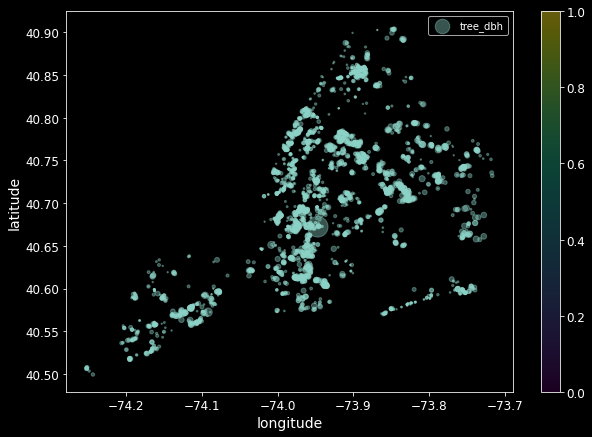

In [12]:

trees.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=trees["tree_dbh"], label="tree_dbh", figsize=(10,7),
             colorbar=True,
             sharex=False)
plt.legend()

In [13]:
# Looking for correlations (only numeric)
corr_matrix = trees.corr()
corr_matrix

,tree_dbh,stump_diam,latitude,longitude
tree_dbh,1.000000,-0.126289,-0.082807,0.051527
stump_diam,-0.126289,1.000000,0.006113,0.023149
latitude,-0.082807,0.006113,1.000000,0.475753
longitude,0.051527,0.023149,0.475753,1.000000


### 4. Prepare the data for machine learning algorithms 
- Data cleaning 
- Handle text and categorical attributes 
- Custom transformers 
- Feature scaling 
- Transformation Pipelines 

In [14]:
# data cleaning 
trees_train_x = strat_train_set.drop("status", axis=1) # drop labels for training set
trees_test_x = strat_test_set.drop("status", axis=1) # drop labels for test set

In [15]:
# handle text and categorical attributes

# trees_cat = trees[["health", "spc_latin"]]

# ordinal: if there is a natural order
# from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()
# trees_cat_encoded = ordinal_encoder.fit_transform(trees_cat)

# one hot encoding 
# from sklearn.preprocessing import OneHotEncoder
# only linear regression needs to drop first (makes this a dummy variable that is not perfectly correlated)
# cat_encoder = OneHotEncoder(drop='first', sparse=False)

# trees_1hot = cat_encoder.fit_transform(trees_cat)
# trees_1hot

In [16]:
# categorical columns
# cat_columns = trees.loc[:, ~trees.columns.isin(['longitude', 'latitude', 'tree_dbh', 'stump_diam'])].columns

# trees = pd.get_dummies(trees, columns = cat_columns, drop_first=True)
# trees

In [17]:
# Preprocessing pipeline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# numerical 
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

from sklearn.preprocessing import OneHotEncoder

# categorical 
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown='ignore')), #ignore tells the encoder to ignore new categories by encoding them with 0's
    ])



In [18]:
# numerical and categorial pipelines
from sklearn.compose import ColumnTransformer

cat_columns = trees_train_x.loc[:, ~trees_train_x.columns.isin(['longitude', 'latitude', 'tree_dbh', 'stump_diam'])].columns.tolist()
num_columns = trees_train_x.loc[:, trees_train_x.columns.isin(['longitude', 'latitude', 'tree_dbh', 'stump_diam'])].columns.tolist()

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_columns),
        ("cat", cat_pipeline, cat_columns),
    ])

In [19]:
X_train = preprocess_pipeline.fit_transform(
    trees_train_x[num_columns + cat_columns])
X_train

array([[-0.17598611, -0.1190197 ,  0.65295842, ...,  1.        ,
         0.        ,  0.        ],
       [-0.56936103, -0.1190197 ,  0.86332264, ...,  0.        ,
         1.        ,  0.        ],
       [-0.7660485 , -0.1190197 , -0.28682057, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.66770476, -0.1190197 ,  0.64537728, ...,  0.        ,
         1.        ,  0.        ],
       [-0.66770476, -0.1190197 , -0.72124186, ...,  0.        ,
         0.        ,  0.        ],
       [-0.66770476, -0.1190197 , -1.02080468, ...,  0.        ,
         0.        ,  0.        ]])

In [20]:
# labels
y_train = strat_train_set["status"].copy()
y_test = strat_test_set["status"].copy()

### 5. Select and train a model 
- Train and evaluate on the training set 
- Measure performance using:
    - cross-validation 
    - precision 
    - recall 
    - f1 score 
- Note: do not run anything using test set yet!

#### multinomial logistic / softmax regression 

##### <span style='background:blue'> softmax: train on training set </span>

In [21]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42, max_iter=1000)
# multi_class: LogisticRegression uses one-versus-the-rest by default but can be changed to softmax using 'multinomial'
# The One-vs-Rest strategy splits a multi-class classification into one binary classification problem per class; i.e. red vs (blue, orange), blue vs (red, orange), orange vs (red, blue)
# solver: 'lbfgs' supports softmax
# C: l2 regularization by default; the higher the value of C, the less the model is regularized 
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, multi_class='multinomial',
                   random_state=42)

##### <span style='background:blue'> softmax: measure accuracy using cross validation </span>

In [22]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(softmax_reg, X_train, y_train, cv=3, verbose=3, scoring='accuracy')
# cv: if int, number of (Stratified)KFold; convention is K=10 according to Gelman ROS book
# scoring: metric; accuracy = ratio of correct predictions
# accuracy is generally not preferred metric for classifiers, especially when dealing with skewed datasets (when some classes are much more frequent than others)
# ^ predicting 'alive' every time will have high accuracy
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.990) total time=   0.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] END ................................ score: (test=0.990) total time=   0.7s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] END ................................ score: (test=0.990) total time=   0.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s finished


0.9900001237190857

In [23]:
# true value counts; use in conjunction with confusion matrix
y_train.value_counts()

Alive    3835
Stump      85
Dead       80
Name: status, dtype: int64

##### <span style='background:blue'> softmax: evaluate performance using cross validation and confusion matrix </span>

In [24]:
from sklearn.model_selection import cross_val_predict
# performs K-fold cross-val like cross_val_score, but returns the predictions made on each test fold
# returns prediction for each instance in the training set using a model that never saw the data during training

y_train_pred = cross_val_predict(softmax_reg, X_train, y_train, cv=3)

In [25]:
# how do our predicted labels match the correct labels?
# Note: confusion matrix, precision, recall and f1 metrics most important on test set
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx # gets alive right 390/393 times (guess dead 3 times), 1/6 on dead (guesses alive), and gets the one stump incorrect :(

array([[3816,   19,    0],
       [  20,   60,    0],
       [   0,    1,   84]])

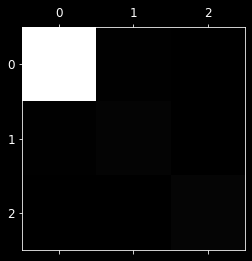

In [26]:
# confusion matrix plot
# main diagonal shows correct classification
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

##### <span style='background:blue'> softmax: precision and recall </span>

In [27]:
# precision and recall
# precision: accuracy of the positive predictions; precision = TP / (TP + FP); (TP = true positives, FP = false positives)
# recall: aka sensitivty or true positive rate; TP / (TP + FN); (FN = false negatives)
from sklearn.metrics import precision_score, recall_score

print("Precision: {:.2f}%".format(100 * precision_score(y_train, y_train_pred, average='macro')))
print("Recall: {:.2f}%".format(100 * recall_score(y_train, y_train_pred, average='macro')))
# average: 'macro' assumes all classes are of equal importance; compute for each individual label and then take average (average of alive, dead, stump)
# ^ 'weighted' gives each label a weight equal to its support (i.e. number of instances with that target label)
# ^ 'micro' gives 391 / 400

Precision: 91.49%
Recall: 91.11%


In [28]:
# F1 score
from sklearn.metrics import f1_score

# computes f1 score for each individual label then computes the average score
f1_score(y_train, y_train_pred, average='macro')

0.9129995857756755

#### support vector machine (SVM) classifier 

##### <span style='background:blue'> svm: train on training set </span>

In [29]:
# SVM good for classification of small- or medium- sized datasets 
from sklearn.svm import SVC

svm_clf = SVC(kernel = 'rbf', gamma="auto", C=1, random_state=42)
# C: regularization parameter (default = 1); if model is overfitting, regularize it by reducing C
# gamma : (default = 'scale'); acts like a regulatization parameter - if overfitting, reduce it; if underfitting, increase it
# ^ increasing gamma makes makes each instances range of influence smaller - decision boundary is more irregular
# ^ dereasing gamma makes each instance have a larger range of influence and the decision boundary smoother
# kernel: (default = 'rbf'); 'rbf' is Gaussian RBF 
# ^ rule of thumb, start with linear kernel (especially if training set is very large and has many feautures), if training set not too large try rbf
# degree: (default = 3); degree of polynomial function (if kernal = 'poly')
# coef0: (default = 0); only relevant for 'poly' and 'sigmoid'; in poly, controls how much model is influenced by high- vs low- degree polynomials
# Note: LinearSVC much faster than SVC(kernal = 'linear')

svm_clf.fit(X_train, y_train)

SVC(C=1, gamma='auto', random_state=42)

##### <span style='background:blue'> svm: measure accuracy using cross validation </span>

In [30]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(svm_clf, X_train, y_train, cv=3, verbose=3, scoring='accuracy')
# cv: if int, number of (Stratified)KFold
# scoring: metric; accuracy = ratio of correct predictions
# accuracy is generally not preferred metric for classifiers, especially when dealing with skewed datasets (when some classes are much more frequent than others)
# ^ predicting 'alive' every time will have high accuracy
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END ................................ score: (test=0.974) total time=   0.1s
[CV] END ................................ score: (test=0.974) total time=   0.1s
[CV] END ................................ score: (test=0.973) total time=   0.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished


0.9737499967195697

##### <span style='background:blue'> svm: evaluate performance using cross validation and confusion matrix </span>

In [31]:
from sklearn.model_selection import cross_val_predict
# performs K-fold cross-val like cross_val_score, but returns the predictions made on each test fold
# returns prediction for each instance in the training set using a model that never saw the data during training

y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)

In [32]:
# how do our predicted labels match the correct labels?
# Note: confusion matrix, precision, recall and f1 metrics most important on test set
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx # gets alive right every time, 0% on dead (guesses alive), and gets the one stump incorrect :(

array([[3835,    0,    0],
       [  80,    0,    0],
       [  25,    0,   60]])

##### <span style='background:blue'> svm: precision and recall </span>

In [33]:
# precision and recall
# precision: accuracy of the positive predictions; precision = TP / (TP + FP); (TP = true positives, FP = false positives)
# recall: aka sensitivty or true positive rate; TP / (TP + FN); (FN = false negatives)
from sklearn.metrics import precision_score, recall_score

print("Precision: {:.2f}%".format(100 * precision_score(y_train, y_train_pred, average='macro')))
print("Recall: {:.2f}%".format(100 * recall_score(y_train, y_train_pred, average='macro')))
# average: 'macro' assumes all classes are of equal importance; compute for each individual label and then take average
# ^ 'weighted' gives each label a weight equal to its support (i.e. number of instances with that target label)
# ^ 'micro' gives 391 / 400

Precision: 65.78%
Recall: 56.86%


/Users/nmontalbano/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# F1 score
from sklearn.metrics import f1_score

# computes f1 score for each individual label then computes the average score
f1_score(y_train, y_train_pred, average='macro')

0.6046937945818088

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

/Users/nmontalbano/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nmontalbano/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Alive       0.97      1.00      0.99      3835
        Dead       0.00      0.00      0.00        80
       Stump       1.00      0.71      0.83        85

    accuracy                           0.97      4000
   macro avg       0.66      0.57      0.60      4000
weighted avg       0.95      0.97      0.96      4000



/Users/nmontalbano/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### random forest classifier

##### <span style='background:blue'> random forest: train on training set </span>

In [36]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
# n_estimators: (default = 100); number of trees in the forest
# max_leaf_nodes: (default = None); maximum number of leaf nodes per tree
# n_jobs: (default = None); number of jobs to run in parallel; -1 means all available CPU cores

rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

##### <span style='background:blue'> random forest: measure accuracy using cross validation </span>

In [37]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(rnd_clf, X_train, y_train, cv=3, verbose=3, scoring='accuracy')
# cv: if int, number of (Stratified)KFold
# scoring: metric; accuracy = ratio of correct predictions
# accuracy is generally not preferred metric for classifiers, especially when dealing with skewed datasets (when some classes are much more frequent than others)
# ^ predicting 'alive' every time will have high accuracy
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.981) total time=   2.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] END ................................ score: (test=0.980) total time=   0.7s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] END ................................ score: (test=0.981) total time=   0.7s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished


0.9809999351412065

##### <span style='background:blue'> random forest: evaluate performance using cross validation and confusion matrix </span>

In [38]:
from sklearn.model_selection import cross_val_predict
# performs K-fold cross-val like cross_val_score, but returns the predictions made on each test fold
# returns prediction for each instance in the training set using a model that never saw the data during training

y_train_pred = cross_val_predict(rnd_clf, X_train, y_train, cv=3)

In [39]:
# how do our predicted labels match the correct labels?
# Note: confusion matrix, precision, recall and f1 metrics most important on test set
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx # gets alive right every time, 0% on dead (guesses alive), and gets the one stump incorrect :(

array([[3835,    0,    0],
       [  74,    4,    2],
       [   0,    0,   85]])

In [40]:
# precision and recall
# precision: accuracy of the positive predictions; precision = TP / (TP + FP); (TP = true positives, FP = false positives)
# recall: aka sensitivty or true positive rate; TP / (TP + FN); (FN = false negatives)
from sklearn.metrics import precision_score, recall_score

print("Precision: {:.2f}%".format(100 * precision_score(y_train, y_train_pred, average='macro')))
print("Recall: {:.2f}%".format(100 * recall_score(y_train, y_train_pred, average='macro')))
# average: 'macro' assumes all classes are of equal importance; compute for each individual label and then take average
# ^ 'weighted' gives each label a weight equal to its support (i.e. number of instances with that target label)
# ^ 'micro' gives 391 / 400

Precision: 98.60%
Recall: 68.33%


In [41]:
# F1 score
from sklearn.metrics import f1_score

# computes f1 score for each individual label then computes the average score
f1_score(y_train, y_train_pred, average='macro')

0.6913514677124614

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

       Alive       0.98      1.00      0.99      3835
        Dead       1.00      0.05      0.10        80
       Stump       0.98      1.00      0.99        85

    accuracy                           0.98      4000
   macro avg       0.99      0.68      0.69      4000
weighted avg       0.98      0.98      0.97      4000



#### k-nearest neighbors (kNN) [fit code]

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
# k_neighbors: (default = 5); number of nearest neighbors to use
# weights: (default = 'uniform'); weighting function to use; 'uniform' = uniform weights; 'distance' = weights points inversely proportional to distance
# algorithm: (default = 'auto'); algorithm to use

knn.fit(X_train, y_train)

KNeighborsClassifier()

#### AdaBoost [fit code]

In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
# base_estimator: (default = None); base estimator from which the boosted ensemble is built; if None, then the base estimator is a decision tree classifier with maximum depth 1
# n_estimators: (default = 50); maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

#### xgboost [fit code]

In [45]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(objective='multi:softmax', n_estimators=1000, max_depth=3, learning_rate=0.1, random_state=42)
# evals: (default = ());  List of validation sets for which metrics will evaluated during training.
# early_stopping_rounds: (default = None); Activates early stopping. Validation metric needs to improve at least once in every early_stopping_rounds round(s) to continue training. Requires at least one item in evals

xgb_cl.fit(X_train, y_train)

# https://xgboost.readthedocs.io/en/latest/tutorials/model.html
# xgboost refers to the engineering goal to push the limit of computations resources for boosted tree algorithms
# model is 'regularized gradient boosting'

/Users/nmontalbano/Library/Python/3.8/lib/python/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:25:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

### 6. Fine-tune the model 
- Grid search
- Randomized search 
- Ensemble methods 
- Analyze the best models and their errors
- Evaluate your systems on the test set 

#### grid search (svm)

In [46]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
# dictionary with parameters as keys and lists of parameter settings to try as values
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']}
 
grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)
# refit: (default = True); refit estimator using the best found parameters on the whole dataset
# probability: (default = False); if True, predict_proba is used to predict probabilities; necessary for soft voting in voting classifier
# ^ uses cross-validation to estimate class probabilities, slowing down training
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.959 total time=  11.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.959 total time=  14.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.959 total time=  18.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.959 total time=  18.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.959 total time=  19.2s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.984 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.983 total time=   0.6s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.983 total time=   0.6s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.980 total time=   0.5s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.983 total time=   0.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   1.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [47]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001, probability=True)


In [48]:
# precision / recall / f1 score after hyperparameter tuning
grid_predictions = grid.predict(X_train)
 
# print classification report
print(classification_report(y_train, grid_predictions))

              precision    recall  f1-score   support

       Alive       1.00      1.00      1.00      3835
        Dead       0.78      0.79      0.78        80
       Stump       1.00      0.99      0.99        85

    accuracy                           0.99      4000
   macro avg       0.92      0.92      0.92      4000
weighted avg       0.99      0.99      0.99      4000



#### grid search (random forest)

In [49]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
# dictionary with parameters as keys and lists of parameter settings to try as values
# Note: there are many more hyperparameters to tune and many more options for each hyperparameter, but we are only using these as an example
param_grid = {'n_estimators': [100, 1000],
              'max_leaf_nodes': [5, 20, None], 
              'max_depth': [1, None]}
 
grid_rf = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=42), param_grid, refit = True, verbose = 2)
# refit: (default = True); refit estimator using the best found parameters on the whole dataset
# probability: (default = False); if True, predict_proba is used to predict probabilities; necessary for soft voting in voting classifier
# ^ uses cross-validation to estimate class probabilities, slowing down training
 
# fitting the model for grid search
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ....max_depth=1, max_leaf_nodes=5, n_estimators=100; total time=   1.7s
[CV] END ....max_depth=1, max_leaf_nodes=5, n_estimators=100; total time=   0.3s
[CV] END ....max_depth=1, max_leaf_nodes=5, n_estimators=100; total time=   0.3s
[CV] END ....max_depth=1, max_leaf_nodes=5, n_estimators=100; total time=   0.3s
[CV] END ....max_depth=1, max_leaf_nodes=5, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=1, max_leaf_nodes=5, n_estimators=1000; total time=   1.1s
[CV] END ...max_depth=1, max_leaf_nodes=5, n_estimators=1000; total time=   1.1s
[CV] END ...max_depth=1, max_leaf_nodes=5, n_estimators=1000; total time=   1.0s
[CV] END ...max_depth=1, max_leaf_nodes=5, n_estimators=1000; total time=   1.0s
[CV] END ...max_depth=1, max_leaf_nodes=5, n_estimators=1000; total time=   1.0s
[CV] END ...max_depth=1, max_leaf_nodes=20, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=1, max_leaf_nodes=20, n_es

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [1, None],
                         'max_leaf_nodes': [5, 20, None],
                         'n_estimators': [100, 1000]},
             verbose=2)

In [50]:
# print best parameter after tuning
print(grid_rf.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid_rf.best_estimator_)

{'max_depth': None, 'max_leaf_nodes': None, 'n_estimators': 1000}
RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)


In [51]:
# precision / recall / f1 score after hyperparameter tuning
grid_rf_predictions = grid_rf.predict(X_train)
 
# print classification report
print(classification_report(y_train, grid_rf_predictions))

              precision    recall  f1-score   support

       Alive       1.00      1.00      1.00      3835
        Dead       1.00      1.00      1.00        80
       Stump       1.00      1.00      1.00        85

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



#### randomized search (logistic)

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# dictionary with parameters as keys and lists of parameter settings to try as values
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
logistic = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', random_state=42)

randomized = RandomizedSearchCV(logistic, distributions, random_state=42)
# refit: (default = True); refit estimator using the best found parameters on the whole dataset

# fitting the model for randomized search
randomized.fit(X_train, y_train)

/Users/nmontalbano/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nmontalbano/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

RandomizedSearchCV(estimator=LogisticRegression(multi_class='multinomial',
                                                random_state=42),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12e01f880>,
                                        'penalty': ['l2', 'l1']},
                   random_state=42)

In [53]:
# print best parameter after tuning
print(randomized.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(randomized.best_estimator_)

{'C': 1.49816047538945, 'penalty': 'l2'}
LogisticRegression(C=1.49816047538945, multi_class='multinomial',
                   random_state=42)


In [54]:
# precision / recall / f1 score after hyperparameter tuning
randomized_predictions = randomized.predict(X_train)
 
# print classification report
print(classification_report(y_train, randomized_predictions))

              precision    recall  f1-score   support

       Alive       1.00      1.00      1.00      3835
        Dead       0.78      0.76      0.77        80
       Stump       1.00      0.99      0.99        85

    accuracy                           0.99      4000
   macro avg       0.93      0.92      0.92      4000
weighted avg       0.99      0.99      0.99      4000



#### ensemble methods (voting classifier)

In [55]:
# often use ensemble methods at the end of a project, once you already have a few good predictors to combine them into even better predictor
# ensemble methods: voting classifier, stacking classifier, bagging classifier, and boosting classifier
# voting classifier: takes predictions from multiple models and combines them using majority voting or highest averaged probabilities
# stacking classifier: takes predictions from multiple models and combines them using averaging
# bagging classifier: takes predictions from multiple models and combines them using bootstrap aggregation
# boosting classifier: takes predictions from multiple models and combines them using gradient boosting

# even if each classifier is a weak learner (only slightly better than random guessing), the ensemble can still be a strong learner
# ^ provided there are a sufficient number of weak learners and they are sufficiently diverse

In [56]:
# build voting classifier using the softmax model and random forests model from grid search and the svm model from randomized search
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('svm', grid.best_estimator_), ('log', randomized.best_estimator_), ('rf', grid_rf.best_estimator_)], 
    voting='soft')
# voting: (default = 'hard'); 'hard' uses majority voting, 'soft' uses highest class probabilities, averaged across all the individual classifiers

voting_clf.fit(X_train, y_train)

/Users/nmontalbano/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('svm',
                              SVC(C=1000, gamma=0.001, probability=True)),
                             ('log',
                              LogisticRegression(C=1.49816047538945,
                                                 multi_class='multinomial',
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=1000,
                                                     n_jobs=-1,
                                                     random_state=42))],
                 voting='soft')

#### evaluate on the test set (voting classifier | svm after grid search)

In [57]:
# voting classifier (majority vote)
from sklearn.metrics import accuracy_score

# run preprocess pipleline to transform the test set data
# call 'transform' not 'fit_transform' so we do not fit the test set
X_test = preprocess_pipeline.transform(trees_test_x[num_columns + cat_columns])

for clf in (randomized.best_estimator_, grid.best_estimator_, grid_rf.best_estimator_, voting_clf, xgb_cl, knn, ada_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/nmontalbano/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.989
SVC 0.988
RandomForestClassifier 0.989


/Users/nmontalbano/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 0.99
[10:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nmontalbano/Library/Python/3.8/lib/python/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier 0.989
KNeighborsClassifier 0.984
AdaBoostClassifier 0.97


In [58]:
# svm after grid search
# final model after grid or randomized search or ensemble (here we use rf model after grid search)
final_model = grid_rf.best_estimator_

# run preprocess pipleline to transform the test set data
# call 'transform' not 'fit_transform' so we do not fit the test set
X_test = preprocess_pipeline.transform(trees_test_x[num_columns + cat_columns])
final_pred = final_model.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test, final_pred)
conf_mx

array([[955,   4,   0],
       [  7,  13,   0],
       [  0,   0,  21]])

In [60]:
# print classification report for the test set and final prediction
print(classification_report(y_test, final_pred))

# Note: do not tweak numbers after this to make performance look better on test set; this tweaking would be unlikely to generalize to new data

              precision    recall  f1-score   support

       Alive       0.99      1.00      0.99       959
        Dead       0.76      0.65      0.70        20
       Stump       1.00      1.00      1.00        21

    accuracy                           0.99      1000
   macro avg       0.92      0.88      0.90      1000
weighted avg       0.99      0.99      0.99      1000



### 7. Present the solution

### 8. Launch, monitor, and maintain the system